In [1]:
import astropy.io.fits as fits
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from astropy.visualization import simple_norm
import ccdproc as ccd
from astropy import visualization as viz
from astropy.visualization import (imshow_norm, MinMaxInterval, SqrtStretch, ZScaleInterval)
from astropy.coordinates import SkyCoord
from photutils.aperture import ApertureStats
from astropy.stats import SigmaClip
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from astropy.wcs import WCS
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from datetime import datetime
from astropy.time import Time

# Data Reduction

In [4]:
directory = '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/*'
glob(directory)

['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/bias',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/calibration',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/dark',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/epsPeg',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/europa',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/flat',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/vega']

In [13]:
files_bias = glob(glob(directory)[1]+'/*')
files_dark = glob(glob(directory)[3]+'/*')
files_flat = glob(glob(directory)[7]+'/*')
files_cali = glob(glob(directory)[2]+'/*')
files_albr = glob(glob(directory)[0]+'/*')
files_denb = glob(glob(directory)[4]+'/*')
files_epsP = glob(glob(directory)[5]+'/*')
files_euro = glob(glob(directory)[6]+'/*')
files_jupi = glob(glob(directory)[8]+'/*')
files_sunn = glob(glob(directory)[9]+'/*')
files_vega = glob(glob(directory)[10]+'/*')

In [26]:
ccd_shape = fits.getdata(files_bias[0]).shape

### Bias

In [28]:
bias = np.zeros((len(files_bias), ccd_shape[0], ccd_shape[1]))
for file in range(len(files_bias)):
    bias[file] = fits.getdata(files_bias[file])

(<matplotlib.image.AxesImage at 0x7f8d944fd4f0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8da6661370>)

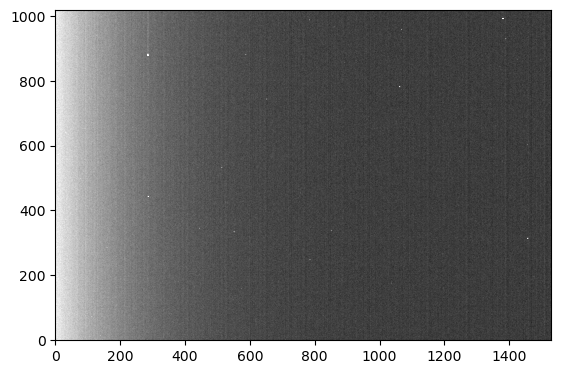

In [56]:
master_bias = np.median(bias, axis=0)
imshow_norm(master_bias, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [59]:
np.mean(master_bias)

997.214548891452

### Dark

In [47]:
files_dark_07 = glob(files_dark[2]+'/*')
files_dark_15 = glob(files_dark[0]+'/*')
files_dark_30 = glob(files_dark[3]+'/*')
files_dark_40 = glob(files_dark[1]+'/*')

In [48]:
dark_07 = np.zeros((len(files_dark_07), ccd_shape[0], ccd_shape[1]))
exptime_dark_07 = fits.getheader(files_dark_07[0])['EXPTIME']
for file in range(len(files_dark_07)):
    dark_07[file] = fits.getdata(files_dark_07[file])

(<matplotlib.image.AxesImage at 0x7f8d945a55e0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94741ca0>)

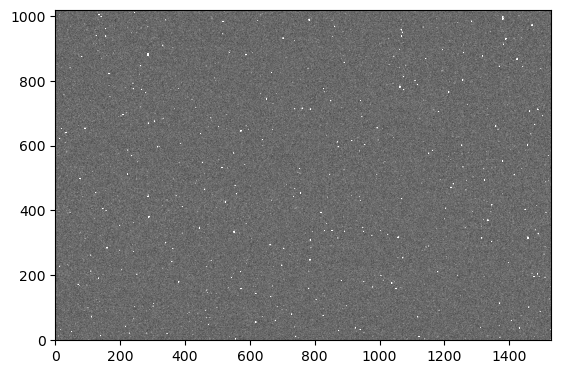

In [60]:
master_dark_07 = np.median(dark_07-master_bias, axis=0)
imshow_norm(master_dark_07, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [49]:
dark_15 = np.zeros((len(files_dark_15), ccd_shape[0], ccd_shape[1]))
exptime_dark_15 = fits.getheader(files_dark_15[0])['EXPTIME']
for file in range(len(files_dark_15)):
    dark_15[file] = fits.getdata(files_dark_15[file])

(<matplotlib.image.AxesImage at 0x7f8d9452a0d0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d949a5430>)

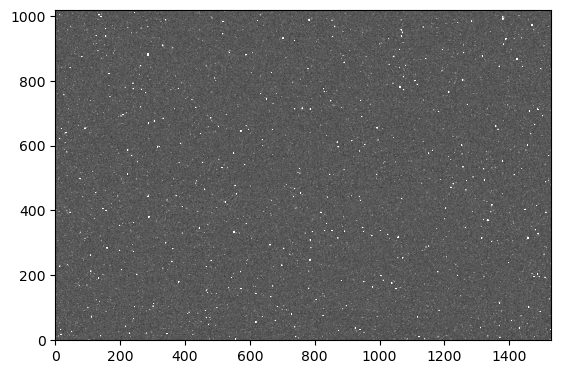

In [61]:
master_dark_15 = np.median(dark_15-master_bias, axis=0)
imshow_norm(master_dark_15, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [50]:
dark_30 = np.zeros((len(files_dark_30), ccd_shape[0], ccd_shape[1]))
exptime_dark_30 = fits.getheader(files_dark_30[0])['EXPTIME']
for file in range(len(files_dark_30)):
    dark_30[file] = fits.getdata(files_dark_30[file])

(<matplotlib.image.AxesImage at 0x7f8d9447b250>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94763f70>)

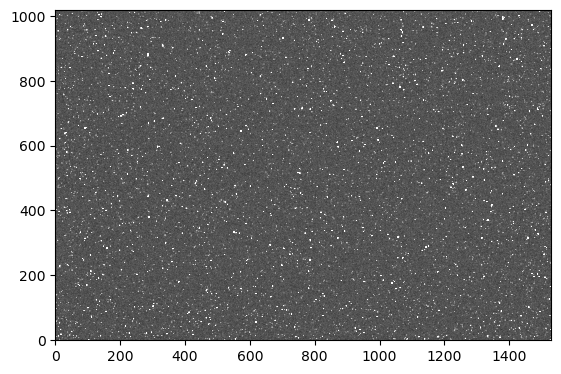

In [62]:
master_dark_30 = np.median(dark_30-master_bias, axis=0)
imshow_norm(master_dark_30, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [51]:
dark_40 = np.zeros((len(files_dark_40), ccd_shape[0], ccd_shape[1]))
exptime_dark_40 = fits.getheader(files_dark_40[0])['EXPTIME']
for file in range(len(files_dark_40)):
    dark_40[file] = fits.getdata(files_dark_40[file])

(<matplotlib.image.AxesImage at 0x7f8d9c0a94f0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d945dc940>)

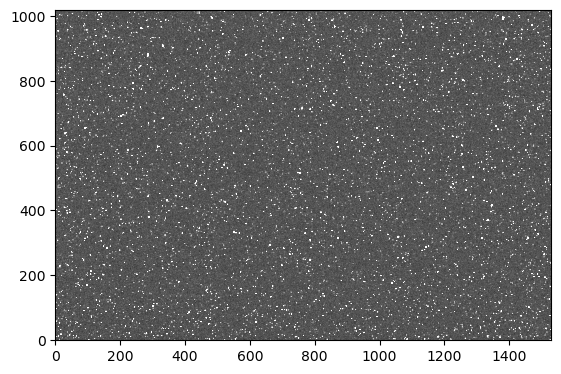

In [63]:
master_dark_40 = np.median(dark_40-master_bias, axis=0)
imshow_norm(master_dark_40, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

### Flat

In [46]:
flat = np.zeros((len(files_flat), ccd_shape[0], ccd_shape[1]))
exptime_flat = fits.getheader(files_flat[0])['EXPTIME']
for file in range(len(files_flat)):
    flat[file] = fits.getdata(files_flat[file])

(<matplotlib.image.AxesImage at 0x7f8d9c07dd60>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8da6772ac0>)

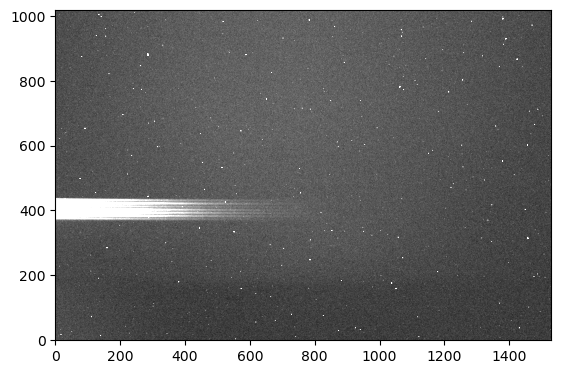

In [64]:
master_flat = np.median(flat-master_bias, axis=0)
imshow_norm(master_flat, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

### Wavelength Calibration

In [37]:
files_cali

['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/calibration/cal_Hg_7s.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/calibration/cal_neon_10s.FIT']

In [52]:
cali_Hg = fits.getdata(files_cali[0])

In [53]:
cali_Ne = fits.getdata(files_cali[1])

### Science

In [38]:
files_albr


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_2.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_3.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_4.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_5.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberiob_40s_1.FIT']

In [39]:
files_denb


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb/deneb_40s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb/deneb_40s_2.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb/deneb_40s_3.FIT']

In [40]:
files_epsP


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/epsPeg/eps_Peg_40s.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/epsPeg/eps_Peg_40s_2.FIT']

In [41]:
files_euro


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/europa/europa_40s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/europa/europa_40s_2.FIT']

In [42]:
files_jupi


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/Jupiter_30s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/Jupiter_30s_2.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/Jupiter_30s_3.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/jupiter_30s_4.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/jupiter_30s_5.FIT']

In [43]:
files_sunn


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun/sun_20s001.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun/sun_20s002.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun/sun_20s003.FIT']

In [44]:
files_vega


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/vega/vega_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/vega/vega_2.FIT']